In [22]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import fiona
import matplotlib

highres_colors = [
    "#0000FF",
    "#008000",
    "#80FF80",
    "#806060"]

highres_colors_5_class = [
    "#0000FF",
    "#008000",
    "#80FF80",
    "#806060",
    "#FF0000"]

highres_colors_6_class = [
    "#0000FF",
    "#0000FF",
    "#008000",
    "#80FF80",
    "#806060",
    "#FF0000"]

one_for_all = [
    "#FFFFFF",
    "#FFFFFF",
    "#FF0000"
]
highres_cmap = matplotlib.colors.ListedColormap(highres_colors)
highres_5_cmap  = matplotlib.colors.ListedColormap(highres_colors_5_class)
highres_6_cmap = matplotlib.colors.ListedColormap(highres_colors_6_class)
one_for_all_cmap = matplotlib.colors.ListedColormap(one_for_all)
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
def plot_tile(path):
    src = rasterio.open(path)
    plt.imshow(src.read(1),vmin=0, vmax=2, cmap=one_for_all_cmap)
    plt.show()

Results for 1 epoch, 2 epoch and 10 epoch Naip_demo_model_tuned

# Naip Demo Model

### Even

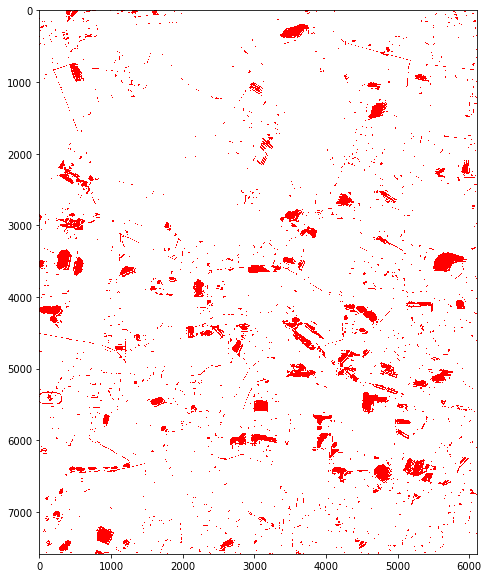

In [68]:
plot_tile("../landcover-old/web_tool/data/binary/test_inference_sup_tuned/test_demo_1_epoch.tif")

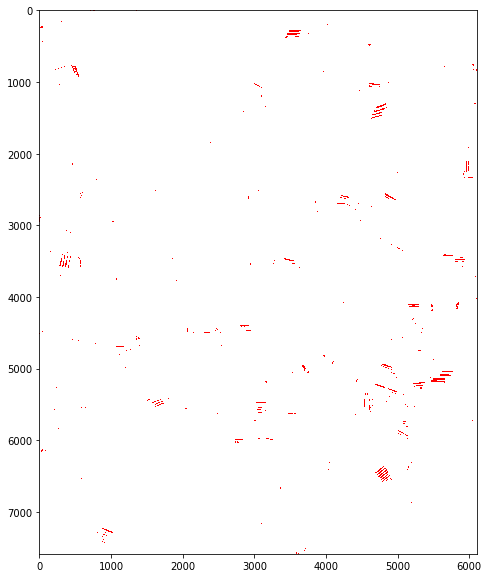

In [35]:
plot_tile("../landcover-old/web_tool/data/binary/test_inference_sup_tuned/test_demo_2_epoch.tif")

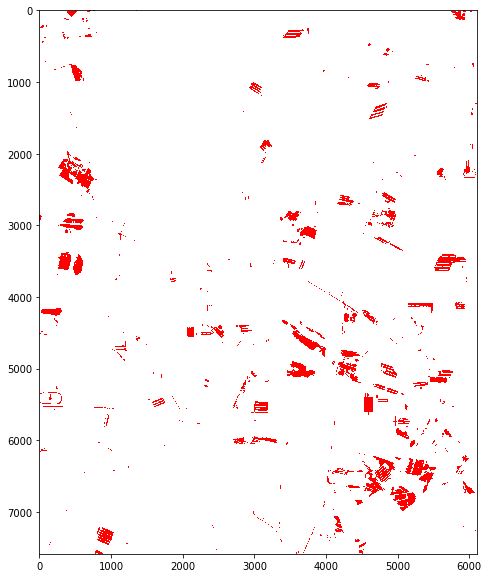

In [36]:
plot_tile("../landcover-old/web_tool/data/binary/test_inference_sup_tuned/test_demo_5_epoch.tif")

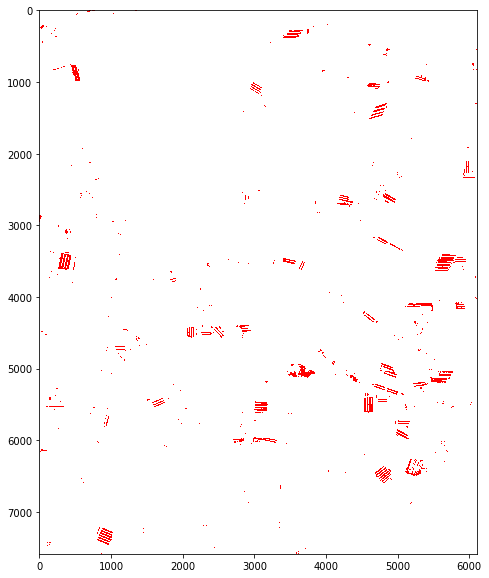

In [43]:
plot_tile("../landcover-old/web_tool/data/binary/test_inference_sup_tuned/test_demo_10_epoch.tif")

## Uneven

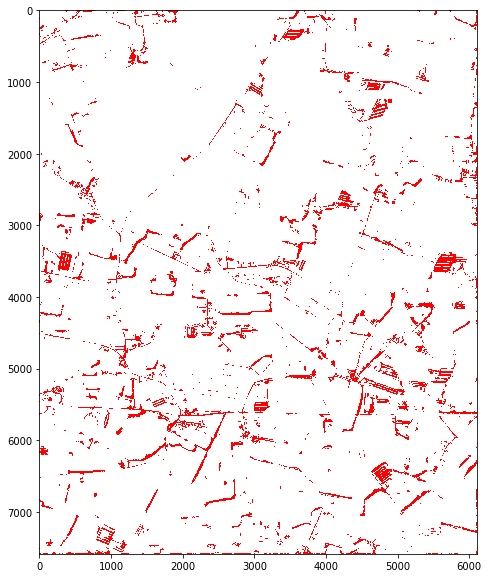

In [5]:
plot_tile("../landcover-old/web_tool/data/binary_1to4/test_inference_sup_tuned/test_demo_1_epoch.tif")

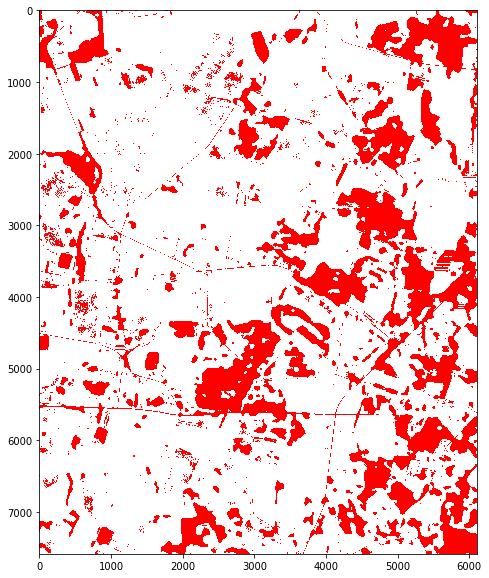

In [6]:
plot_tile("../landcover-old/web_tool/data/binary_1to4/test_inference_sup_tuned/test_demo_2_epoch.tif")

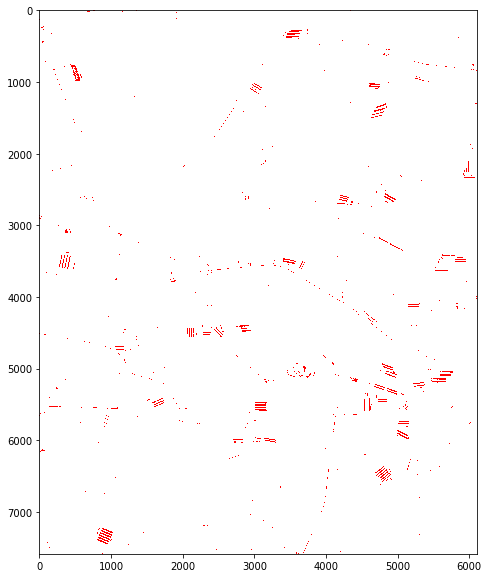

In [7]:
plot_tile("../landcover-old/web_tool/data/binary_1to4/test_inference_sup_tuned/test_demo_5_epoch.tif")

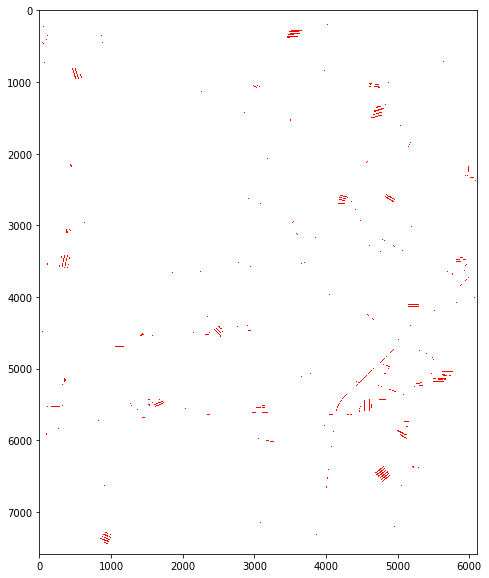

In [8]:
plot_tile("../landcover-old/web_tool/data/binary_1to4/test_inference_sup_tuned/test_demo_10_epoch.tif")

# Autoencoder tuned

## Even

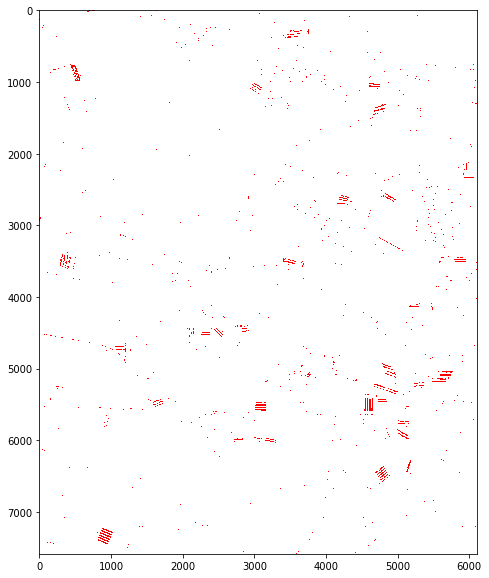

In [53]:
plot_tile("../landcover-old/web_tool/data/binary/test_inference_ae_tuned/test_demo_1_epoch.tif")

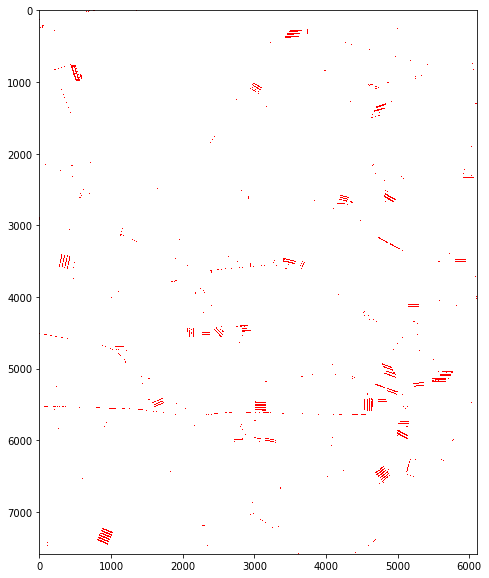

In [54]:
plot_tile("../landcover-old/web_tool/data/binary/test_inference_ae_tuned/test_demo_2_epoch.tif")

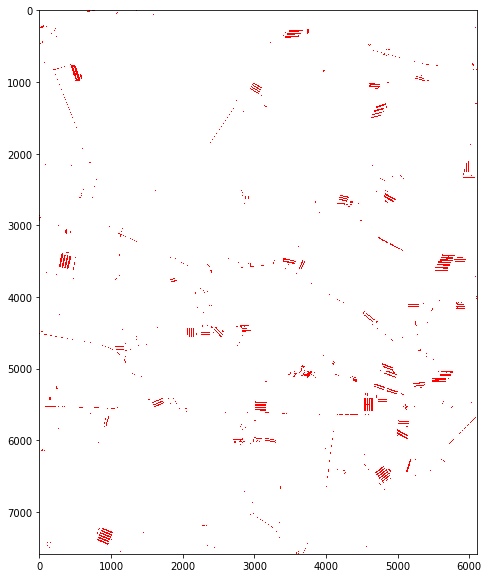

In [55]:
plot_tile("../landcover-old/web_tool/data/binary/test_inference_ae_tuned/test_demo_5_epoch.tif")

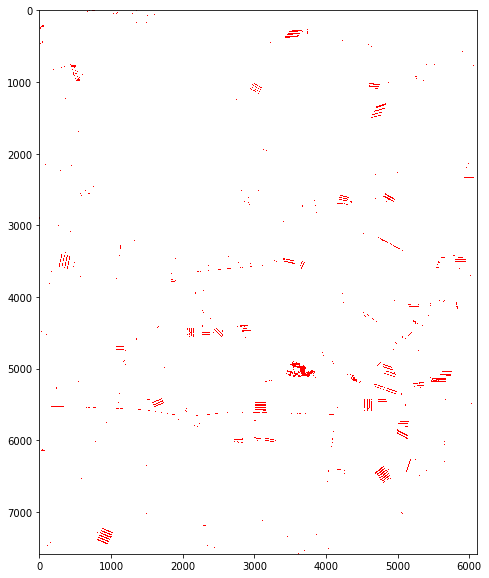

In [56]:
plot_tile("../landcover-old/web_tool/data/binary/test_inference_ae_tuned/test_demo_10_epoch.tif")

### Uneven

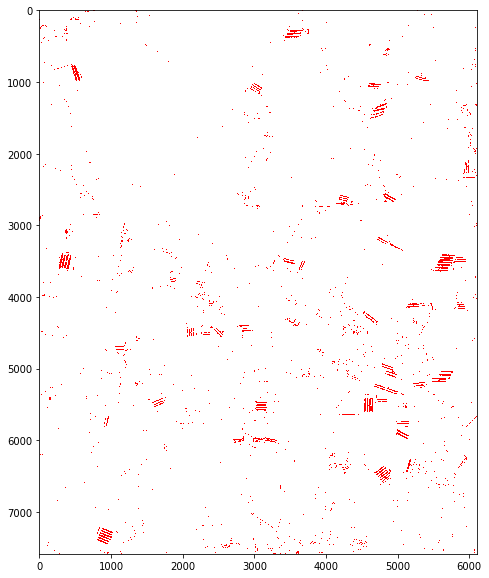

In [9]:
plot_tile("../landcover-old/web_tool/data/binary_1to4/test_inference_ae_tuned/test_demo_1_epoch.tif")

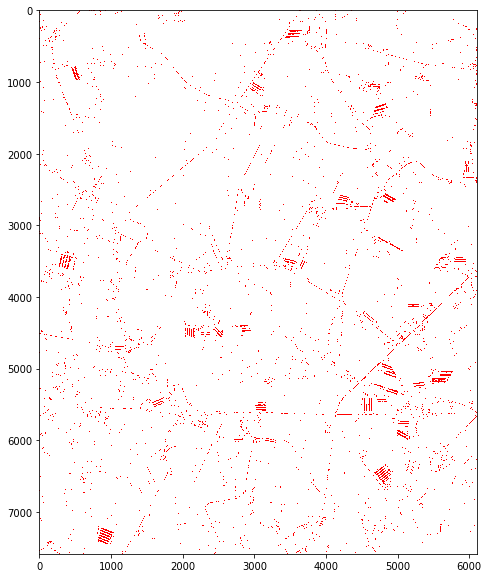

In [50]:
plot_tile("../landcover-old/web_tool/data/binary_1to4/test_inference_ae_tuned/test_demo_2_epoch.tif")

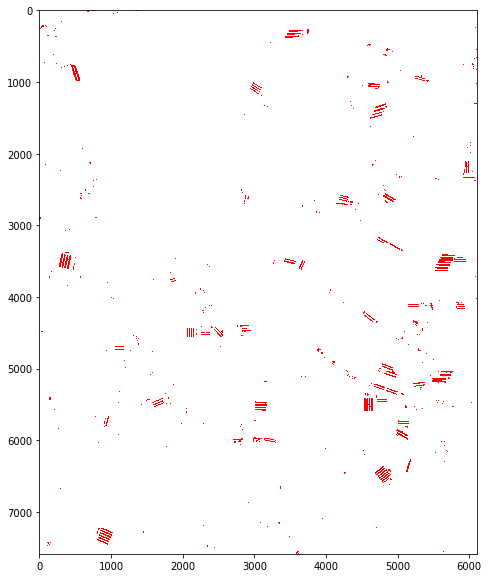

In [10]:
plot_tile("../landcover-old/web_tool/data/binary_1to4/test_inference_ae_tuned/test_demo_5_epoch.tif")

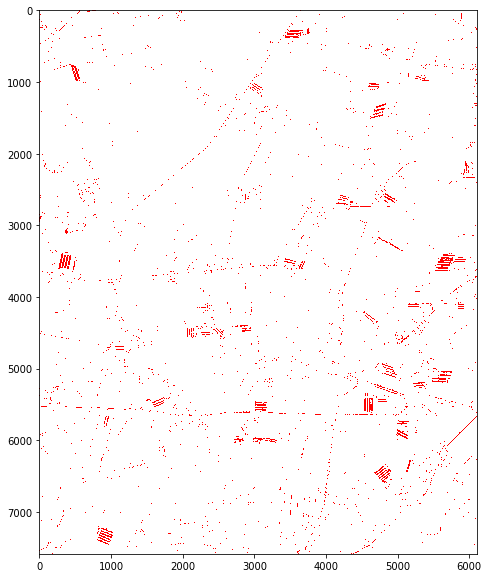

In [52]:
plot_tile("../landcover-old/web_tool/data/binary_1to4/test_inference_ae_tuned/test_demo_10_epoch.tif")

# Metrics

In [ ]:
from sklearn.metrics import roc
def get_metrics(pred_path):
    src = rasterio.open(pred_path)
    raw = np.array(src.read())
    y_pred = (raw == 2) # chicken
    y_pred = y_pred.astype(int)
    y_pred = y_pred.squeeze()
    
    src_masked = rasterio.open("./m_3807537_ne_18_1_20170611_rasterized2.tif")
    y_true = np.array(src_masked.read())
    y_true = y_true.squeeze()
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    assert tp + tn + fp + fn == y_true.size

    n = tp + fp + tn + fn

    acc = (tp+tn)/n
    recall = (tp/(tp+fn))
    precision = tp / (tp + fp)
    iou = tp /(tp + fn + fp)

    print("IOU: {}".format(iou))
    print("Accuracy: {}".format(acc))
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))

# Binary

# Demo model

## Equal representation

In [24]:
# 1 Epoch
get_metrics("../landcover-old/web_tool/data/binary/test_inference_sup_tuned/test_demo_1_epoch.tif")

IOU: 0.12398260984669861
Accuracy: 0.9543103347841639
Precision: 0.12634859503303064
Recall: 0.8687824645209165


In [25]:
# 2 Epoch
get_metrics("../landcover-old/web_tool/data/binary/test_inference_sup_tuned/test_demo_2_epoch.tif")

IOU: 0.3228252946630899
Accuracy: 0.9941072213738548
Precision: 0.6905477861040842
Recall: 0.37742614321491513


In [26]:
# 5 Epoch
get_metrics("../landcover-old/web_tool/data/binary/test_inference_sup_tuned/test_demo_5_epoch.tif")

IOU: 0.214667263076591
Accuracy: 0.9739395466625358
Precision: 0.21675491932529717
Recall: 0.9570598738521473


In [27]:
# 10 Epoch
get_metrics("../landcover-old/web_tool/data/binary/test_inference_sup_tuned/test_demo_10_epoch.tif")

IOU: 0.5344325799510575
Accuracy: 0.9940154639241984
Precision: 0.5593841461914951
Recall: 0.9229663296540209


## Uneven representation

In [28]:
# 1 Epoch
get_metrics("../landcover-old/web_tool/data/binary_1to4/test_inference_sup_tuned/test_demo_1_epoch.tif")

IOU: 0.10382757120375573
Accuracy: 0.9481405146788188
Precision: 0.10646746882563728
Recall: 0.8072245153510806


In [29]:
# 2 Epoch
get_metrics("../landcover-old/web_tool/data/binary_1to4/test_inference_sup_tuned/test_demo_2_epoch.tif")

IOU: 0.03390946715200104
Accuracy: 0.7923474977378865
Precision: 0.033933872006401314
Recall: 0.9792314024673036


In [66]:
# 5 Epoch
get_metrics("../landcover-old/web_tool/data/binary_1to4/test_inference_sup_tuned/test_demo_5_epoch.tif")

IOU: 0.48046000641927966
Accuracy: 0.9946568167824008
Precision: 0.6349122743792397
Recall: 0.6638704665615435


In [86]:
# 10 Epoch
get_metrics("../landcover-old/web_tool/data/binary_1to4/test_inference_sup_tuned/test_demo_10_epoch.tif")

IOU: 0.2791048625350142
Accuracy: 0.9939089709142045
Precision: 0.7009426702577914
Recall: 0.31683343381875523


# AE tuned model

## Equal representation


In [68]:
# 1 Epoch
get_metrics("../landcover-old/web_tool/data/binary/test_inference_ae_tuned/test_demo_1_epoch.tif")

IOU: 0.37016596955942555
Accuracy: 0.9932880062031747
Precision: 0.5510675234180038
Recall: 0.5299891011965495


In [69]:
# 2 Epoch
get_metrics("../landcover-old/web_tool/data/binary/test_inference_ae_tuned/test_demo_2_epoch.tif")

IOU: 0.4778036082187204
Accuracy: 0.9951440611376888
Precision: 0.7053619440686384
Recall: 0.5969442769687413


In [71]:
# 5 Epoch
get_metrics("../landcover-old/web_tool/data/binary/test_inference_ae_tuned/test_demo_5_epoch.tif")

IOU: 0.5754104445763355
Accuracy: 0.9953851374937811
Precision: 0.6460874623612297
Recall: 0.8402571653835451


In [72]:
# 10 Epoch
get_metrics("../landcover-old/web_tool/data/binary/test_inference_ae_tuned/test_demo_10_epoch.tif")

IOU: 0.41067953858889045
Accuracy: 0.9940865743295751
Precision: 0.6139507823649665
Recall: 0.5536505194323347


## Uneven representation

In [80]:
# 1 Epoch
get_metrics("../landcover-old/web_tool/data/binary_1to4/test_inference_ae_tuned/test_demo_1_epoch.tif")

IOU: 0.4003813155386082
Accuracy: 0.9911248777250539
Precision: 0.4461017257452082
Recall: 0.7961923754753734


In [84]:
# 2 Epoch
get_metrics("../landcover-old/web_tool/data/binary_1to4/test_inference_ae_tuned/test_demo_2_epoch.tif")

IOU: 0.21776633746585417
Accuracy: 0.9823306392212721
Precision: 0.24516201874223778
Recall: 0.6608761942305909


In [82]:
# 5 Epoch
get_metrics("../landcover-old/web_tool/data/binary_1to4/test_inference_ae_tuned/test_demo_5_epoch.tif")

IOU: 0.6175014796377523
Accuracy: 0.9959286056707959
Precision: 0.6724860658904034
Recall: 0.8830726509600223


In [83]:
# 10 Epoch
get_metrics("../landcover-old/web_tool/data/binary_1to4/test_inference_ae_tuned/test_demo_10_epoch.tif")

IOU: 0.32582716072766704
Accuracy: 0.9877133473971995
Precision: 0.35515568344581083
Recall: 0.7978011084314999


plot precision recall for epoch 1-10, recall

# Non-binary

## Demo

In [99]:
get_metrics("../landcover-old/web_tool/data/test_inference_demo_tuned/test_demo_1_epoch.tif")

IOU: 0.12691300858995777
Accuracy: 0.992840286806215
Precision: 0.5788078039883852
Recall: 0.13982643075781467


In [100]:
get_metrics("../landcover-old/web_tool/data/test_inference_demo_tuned/test_demo_2_epoch.tif")

IOU: 0.2640637654966566
Accuracy: 0.984924507761088
Precision: 0.29317126787572645
Recall: 0.7267501855115481


In [101]:
get_metrics("../landcover-old/web_tool/data/test_inference_demo_tuned/test_demo_10_epoch.tif")

IOU: 0.3571536931530863
Accuracy: 0.9884806968474531
Precision: 0.3792314349964396
Recall: 0.8598431267971431


## AE tuned model

In [96]:
get_metrics("../landcover-old/web_tool/data/test_inference_ae_tuned/test_demo_1_epoch.tif")

IOU: 0.2951049114581202
Accuracy: 0.9869934839913131
Precision: 0.3309385817685933
Recall: 0.7315734857619887


In [97]:
get_metrics("../landcover-old/web_tool/data/test_inference_ae_tuned/test_demo_2_epoch.tif")

IOU: 0.3822778537648368
Accuracy: 0.9908018820093695
Precision: 0.43321680790380657
Recall: 0.7647684583990353


In [98]:
get_metrics("../landcover-old/web_tool/data/test_inference_ae_tuned/test_demo_10_epoch.tif")

IOU: 0.27879857131548835
Accuracy: 0.98702668754528
Precision: 0.32230043661098917
Recall: 0.6737982330025044


## Metric evaluation

In [12]:
even_ae_loss = [0.8692, 0.1658, 0.0824 ,0.1202]
even_ae_iou = [0.3701659696,0.4778036082,0.5754104446 ,0.4106795386]
uneven_ae_loss = [0.6616,0.3473,0.3359,0.1817]
uneven_ae_iou = [0.4003813155,0.2177663375,0.6175014796,0.3258271607]

even_sup_loss = [
2.5982,
0.1257,
0.1043,
0.1977
]

even_sup_iou = [
    0.1239826098,
0.3228252947,
0.2146672631,
0.53443258
]

uneven_sup_iou = [
    0.1038275712,
0.03390946715,
0.4804600064,
0.2791048625
]

uneven_sup_loss = [
    0.5877,
0.5155,
0.1976,
0.2002
]

Text(0, 0.5, 'Loss')

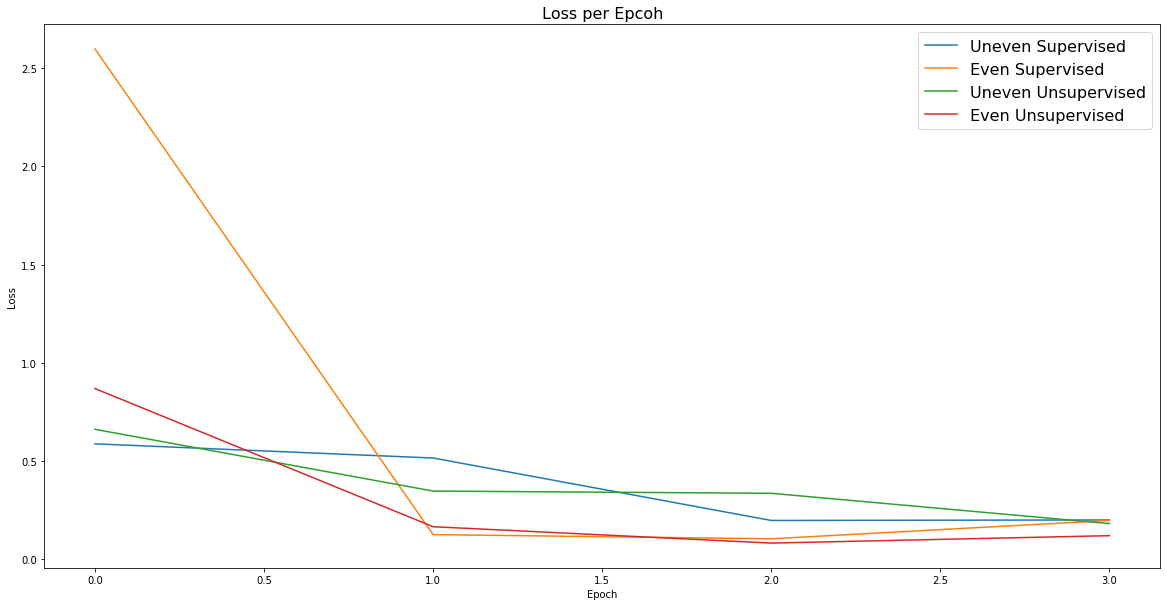

In [45]:
plt.plot(uneven_sup_loss, label="Uneven Supervised")
plt.plot(even_sup_loss, label="Even Supervised")
plt.plot(uneven_ae_loss, label="Uneven Unsupervised")
plt.plot(even_ae_loss, label="Even Unsupervised")
plt.legend(loc='upper right',prop={'size': 16})
plt.title("Loss per Epcoh", fontsize=16)
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'IOU')

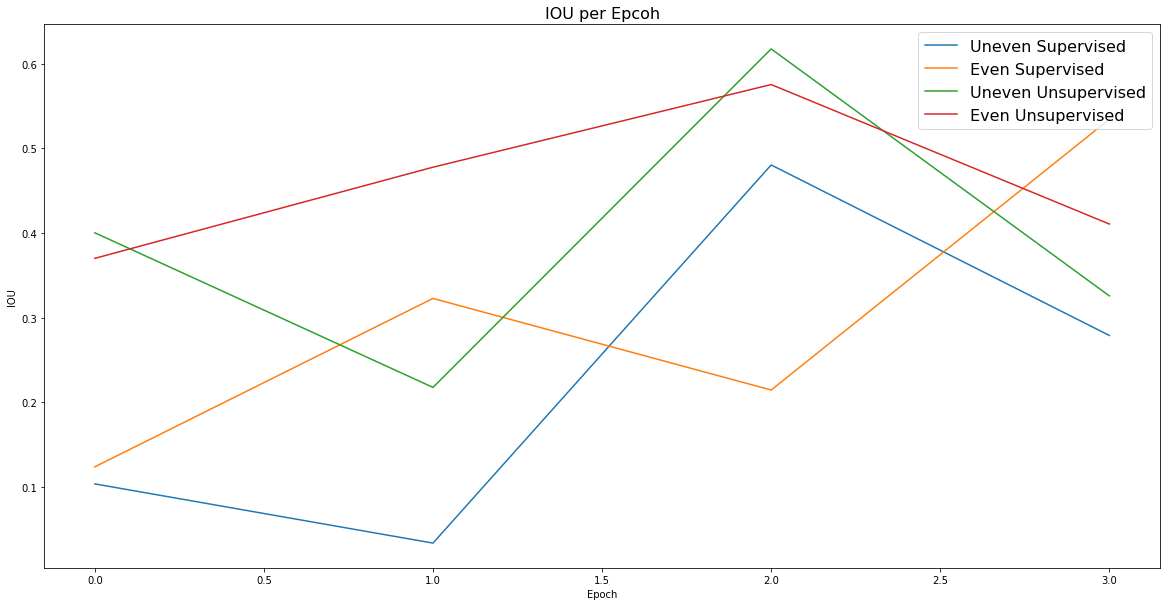

In [44]:
plt.plot(uneven_sup_iou, label="Uneven Supervised")
plt.plot(even_sup_iou, label="Even Supervised")
plt.plot(uneven_ae_iou, label="Uneven Unsupervised")
plt.plot(even_ae_iou, label="Even Unsupervised")
plt.legend(loc='upper right',prop={'size': 16})
plt.title("IOU per Epcoh", fontsize=16)
plt.xlabel("Epoch")
plt.ylabel("IOU")